In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [24]:
data = pd.read_csv('Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


## Map the data

In [25]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


## Select the features

In [26]:
x = data_mapped.iloc[:,3:4]
x

,continent
0,0
1,2
2,3
3,0
4,1
...,...
236,5
237,2
238,3
239,3


## Clustering

In [27]:
kmeans = KMeans(7) # 7 indicates no of clusters

In [28]:
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

## Clustering Results

In [29]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 3, 0, 4, 4, 4, 2, 5, 2, 1, 6, 1, 6, 0, 1, 4, 2, 3, 4, 3, 3,
       2, 4, 2, 0, 0, 4, 0, 4, 0, 0, 5, 5, 0, 2, 2, 3, 3, 4, 5, 2, 3, 3,
       3, 3, 1, 5, 3, 3, 0, 0, 0, 0, 2, 2, 4, 4, 3, 0, 4, 0, 3, 5, 3, 3,
       4, 4, 3, 4, 1, 5, 4, 4, 1, 3, 4, 2, 4, 3, 3, 3, 3, 3, 4, 0, 0, 0,
       1, 5, 2, 6, 0, 4, 0, 4, 2, 4, 2, 2, 6, 4, 2, 2, 4, 2, 4, 0, 4, 2,
       2, 2, 2, 3, 2, 2, 1, 0, 2, 4, 2, 2, 2, 3, 3, 0, 4, 2, 3, 4, 4, 4,
       2, 0, 3, 4, 4, 3, 6, 0, 1, 4, 3, 4, 2, 4, 2, 1, 3, 3, 0, 6, 3, 2,
       3, 1, 3, 1, 3, 0, 1, 4, 4, 2, 1, 1, 2, 2, 0, 1, 5, 2, 1, 1, 4, 0,
       2, 4, 5, 2, 1, 2, 4, 4, 3, 3, 2, 3, 3, 3, 2, 6, 6, 1, 3, 0, 4, 3,
       3, 0, 4, 3, 5, 4, 4, 4, 3, 0, 6, 2, 0, 3, 3, 2, 2, 2, 2, 1, 0, 3,
       2, 2, 3, 3, 4, 5, 0, 2, 4, 0, 5, 0, 0, 2, 1, 1, 1, 2, 3, 3, 3],
      dtype=int32)

In [30]:
data_cluster = data.copy()
data_cluster['Clusters'] = identified_clusters
data_cluster

,name,Longitude,Latitude,continent,Clusters
0,Aruba,-69.982677,12.520880,North America,0
1,Afghanistan,66.004734,33.835231,Asia,2
2,Angola,17.537368,-12.293361,Africa,3
3,Anguilla,-63.064989,18.223959,North America,0
4,Albania,20.049834,41.142450,Europe,4
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania,1
237,Yemen,47.586762,15.909280,Asia,2
238,South Africa,25.083901,-29.000341,Africa,3
239,Zambia,27.774759,-13.458242,Africa,3


## Plot the data

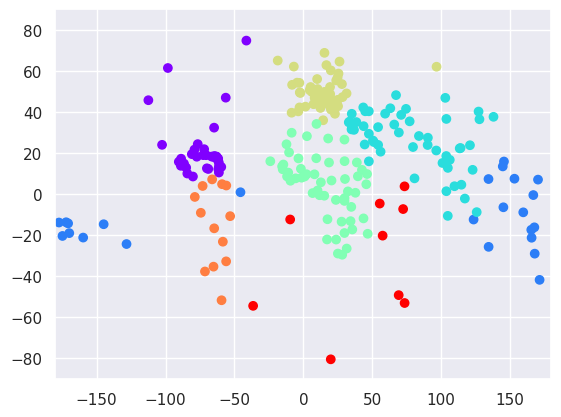

In [33]:
plt.scatter(data['Longitude'], data['Latitude'],c=data_cluster['Clusters'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()